In [206]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
#import qi
import time
datapath = 'data/'
vol_limit = 15000
WHISTLE_BUFF_LEN = 1024
WHISTLE_FFT_LEN = 2 * WHISTLE_BUFF_LEN
SEQ_LIMIT = 1000

# Data processing


# Load audio

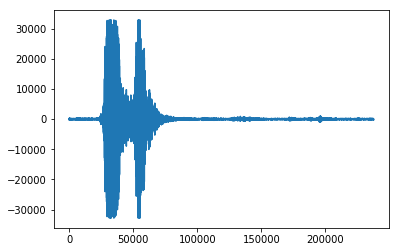

In [207]:
fs, data = wavfile.read(datapath + '2.wav') 
plt.plot(data)

## Extract positive segments (with whistle)

In [208]:
pos_segments = []

In [209]:
def get_wistle_bounds(sample, rev=False):
    """
    This function find beginnings of whistle segments
    """
    if rev:
        sample = sample[::-1]
    
    bounds = []
    l = 0
    last_seen = 0
    N = len(sample)
    print(N)
    for i in range(1, N):
        b1 = abs(sample[i-1]) < vol_limit
        b2 = abs(sample[i]) > vol_limit
        
        if last_seen == 0:
            if b1 and b2:
                if rev:
                    bounds.append(N - 1 - i)
                else:
                    bounds.append(i)
        
        if last_seen > 0:
            last_seen -= 1
        
        if b2:
            last_seen = SEQ_LIMIT
    
    
    return bounds    

In [210]:
l_s = get_wistle_bounds(data)
print(l_s)

237568
[27796, 52339]


In [211]:
r_s = get_wistle_bounds(data, rev=True)[::-1]
r_s

237568


[39240, 59375]

In [215]:
for l, r in zip(l_s, r_s):
    pos_segments.append((l, r))

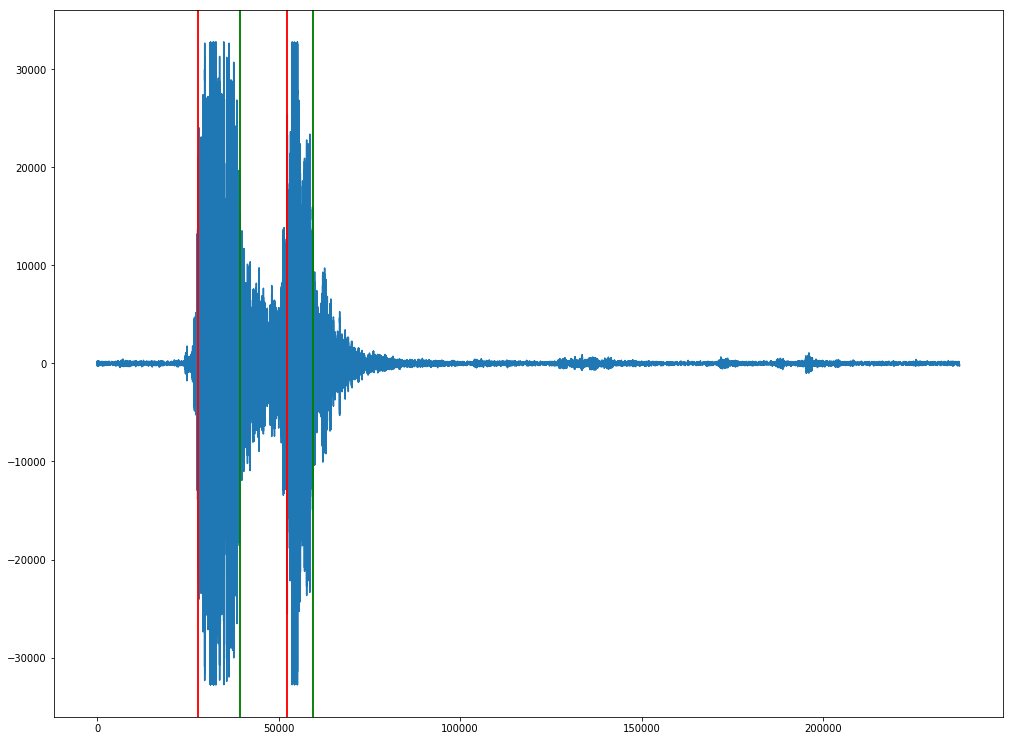

In [218]:
plt.figure(figsize=(17, 13))
plt.plot(data)
for l, r in pos_segments:
    plt.axvline(l, color='red')
    plt.axvline(r, color='green')

## Extract negative segments (without whistle)

In [219]:
def get_wistle_bounds(sample, rev=False):
    pass

## augmentation of this segments (dividing into segments with size WHISTLE_FFT_LEN)

In [221]:
# list of segments with size WHISTLE_FFT_LEN
X = [[],
     [],
     ..] 
# list with class number: 1 for positive 0 for negative 
Y = []

SyntaxError: invalid syntax (<ipython-input-221-6ae977bf868b>, line 4)